In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Abro el dataset generado

In [3]:
df_confirmados = pd.read_feather('./data/pivot_data')

In [4]:
df_confirmados.index = df_confirmados['index']
df_confirmados.drop('index', axis=1, inplace=True)

In [5]:
df_confirmados

,argentino,asistencia_respiratoria,confirmados,cuidado_intensivo,edad,fallecidos,presentan_sintomas,privado,publico,internacion,sexo_F,sexo_M
index,,,,,,,,,,,,
2020-03-01,0,0,0,0,0.000000,0,0,0,0,0,0,0
2020-03-02,1,0,1,0,43.000000,0,1,1,0,1,0,1
2020-03-03,0,0,0,0,0.000000,0,0,0,0,0,0,0
2020-03-04,0,0,0,0,0.000000,0,0,0,0,0,0,0
2020-03-05,5,1,5,1,50.600000,1,5,3,2,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,678,7,694,9,44.386167,12,359,394,300,54,348,346
2020-09-27,556,2,567,6,40.890212,7,335,307,260,45,274,293
2020-09-28,764,3,785,6,41.391614,9,431,480,305,53,399,386


In [6]:
df_confirmados.shape

(214, 12)

### Probamos distintos modelos de regresion


#### Divido el dataset en train-test (sin usar split, para mantener la temporalidad)

In [7]:
#selecciono las variables a utilizar
#selecciono el primer 70% de los datos para entrenar el modelo
x_train =  np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","presentan_sintomas","internacion"]].iloc[0:150,:])
#x_train =  np.array(df_confirmados[["cuidado_intensivo","asistencia_respiratoria","presentan_sintomas","internacion"]].iloc[0:150,:])
y_train =  np.array(df_confirmados[["fallecidos"]].iloc[0:150]) 

#me quedo con el 30% restante para testear
x_test = np.array(df_confirmados[["asistencia_respiratoria","confirmados","cuidado_intensivo","presentan_sintomas","internacion"]].iloc[150:215,:])
#x_test = np.array(df_confirmados[["asistencia_respiratoria","cuidado_intensivo","presentan_sintomas","internacion"]].iloc[150:215,:])
y_test = np.array(df_confirmados[["fallecidos"]].iloc[150:2215,:]) 

In [8]:
print(x_train.shape)
print(x_test.shape)

(150, 5)
(64, 5)


In [9]:
y_test.shape

(64, 1)

In [10]:
# Vamos a crear un dataframe para guardar los resultados de cada estimador
results_df = pd.DataFrame(columns=['Model','Features','R2','MSE','MAE'])
results_df

,Model,Features,R2,MSE,MAE


In [11]:
#plt.scatter(x_train[:,],y_train)

In [12]:
# Definimos el escalador 
# # auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(x_train) # Fiteamos para los x_train
scaler

StandardScaler()

In [13]:
# Transformamos los x_train y x_test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
grad_poly = 2
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)

### Linear Regression

#### Linear Features 

In [14]:
#Definimos el estimador
est = LinearRegression()
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 2
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [15]:
#Entrenamos
gs.fit(x_train_scaled, y_train)

GridSearchCV(cv=2, estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True]},
             scoring='neg_mean_squared_error')

In [16]:
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

# Usamos x_test (del train- test split) para predecir con el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled)
#linear_prediction

LinearRegression() 

{'fit_intercept': True} 

-397.87013651827243 



In [17]:
#Calculamos las metricas R2, MSE y MAE
lineal_linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
lineal_linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
lineal_linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)

R2 score: 0.135217
MAE: 8.776772
MSE: 106.516069


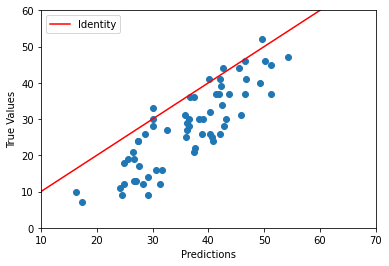

In [18]:
#Vamos a plotear Predictions vs True values
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((10,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {lineal_linear_r2:.6f}')
print(f'MAE: {lineal_linear_mae:.6f}')
print(f'MSE: {lineal_linear_mse:.6f}')


In [19]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Linear',
                                'Features':'Linear',
                                'R2':lineal_linear_r2,
                                'MSE':lineal_linear_mse,
                                'MAE':lineal_linear_mae},ignore_index=True)

In [20]:
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.135217,106.516069,8.776772


### Polynomial Features

In [21]:
#Usamos los mismos parametros para este nuevo GS.
gs = GridSearchCV(est, param_grid=parameters,refit=True, cv=n_folds, scoring="neg_mean_squared_error")
#Entrenamos
gs.fit(x_train_poly_scaled, y_train)
# Mostramos el mejor estimador, sus hyperparametros seleccionados y su resultado
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression(fit_intercept=False) 

{'fit_intercept': False} 

-22949.57275731391 



In [22]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_test_poly_scaled)

# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test , y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test , y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test , y_pred=poly_linear_prediction)

R2 score: 0.490337
MAE: 6.795781
MSE: 62.775651


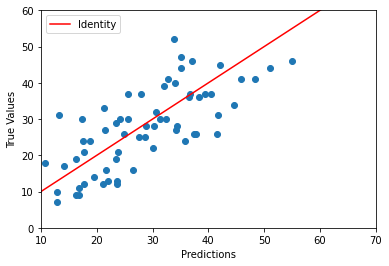

In [23]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((10,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {poly_linear_r2:.6f}')
print(f'MAE: {poly_linear_mae:.6f}')
print(f'MSE: {poly_linear_mse:.6f}')

In [24]:
results_df = results_df.append({'Model':'Linear',
                                'Features':'Poly',
                                'R2':poly_linear_r2,
                                'MSE':poly_linear_mse,
                                'MAE':poly_linear_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.135217,106.516069,8.776772
1,Linear,Poly,0.490337,62.775651,6.795781


### Support Vector Regression

In [25]:
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

#### Linear Features

In [26]:
# Entrenamos con linear features ESCALADAS!
gs.fit(x_train_scaled, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  47 tasks      | elapsed:    0.4s


SVR(C=5000, epsilon=0.001, gamma=0.001, max_iter=25000) 

{'C': 5000, 'epsilon': 0.001, 'gamma': 0.001} 

-127.33252174442536 



[Parallel(n_jobs=3)]: Done 355 out of 360 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:    0.7s finished


In [27]:
# Prediccion + Metricas
svr_linear_prediction = gs.best_estimator_.predict(x_test_scaled)

svr_linear_r2 = r2_score(y_true=y_test, y_pred=svr_linear_prediction)
svr_linear_mse = mean_squared_error(y_true=y_test, y_pred=svr_linear_prediction)
svr_linear_mae = mean_absolute_error(y_true=y_test, y_pred=svr_linear_prediction)

R2 score: 0.611127
MAE: 5.723356
MSE: 47.897849


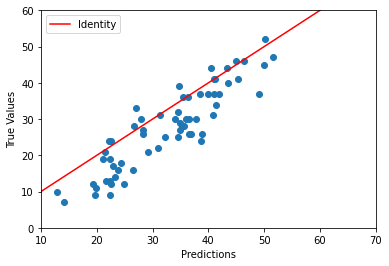

In [28]:
#Vamos a plotear Predictions vs True values del set polinomico
plt.scatter(svr_linear_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((10,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {svr_linear_r2:.6f}')
print(f'MAE: {svr_linear_mae:.6f}')
print(f'MSE: {svr_linear_mse:.6f}')

In [29]:
results_df = results_df.append({'Model':'SVR',
                                'Features':'Linear',
                                'R2':svr_linear_r2,
                                'MSE':svr_linear_mse,
                                'MAE':svr_linear_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.135217,106.516069,8.776772
1,Linear,Poly,0.490337,62.775651,6.795781
2,SVR,Linear,0.611127,47.897849,5.723356


#### Features Polinomicas

In [30]:
gs.fit(x_train_poly_scaled, y_train)

print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 180 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    0.0s


SVR(C=5000, epsilon=1, gamma=0.001, max_iter=25000) 

{'C': 5000, 'epsilon': 1, 'gamma': 0.001} 

-137.37931429575488 



[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:    0.2s finished


In [31]:
# Prediccion + Metricas
poly_svr_prediction = gs.best_estimator_.predict(x_test_poly_scaled)

poly_svr_r2 = r2_score(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mse = mean_squared_error(y_true=y_test, y_pred=poly_svr_prediction)
poly_svr_mae = mean_absolute_error(y_true=y_test, y_pred=poly_svr_prediction)

R2 score: 0.309068
MAE: 7.573133
MSE: 85.102731


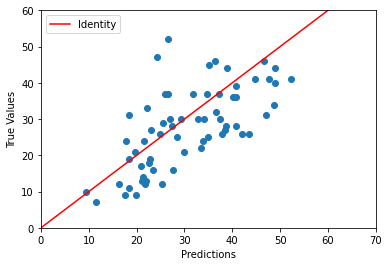

In [32]:
#Plot
plt.scatter(poly_svr_prediction, y_test)
plt.plot(np.arange(0,100),np.arange(0,100), 'r', label='Identity')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.xlim((0,70))
plt.ylim((0,60))
plt.legend()
print(f'R2 score: {poly_svr_r2:.6f}')
print(f'MAE: {poly_svr_mae:.6f}')
print(f'MSE: {poly_svr_mse:.6f}')

In [33]:
#Guardamos
results_df = results_df.append({'Model':'SVR',
                                'Features':'Poly',
                                'R2':poly_svr_r2,
                                'MSE':poly_svr_mse,
                                'MAE':poly_svr_mae},ignore_index=True)
results_df

,Model,Features,R2,MSE,MAE
0,Linear,Linear,0.135217,106.516069,8.776772
1,Linear,Poly,0.490337,62.775651,6.795781
2,SVR,Linear,0.611127,47.897849,5.723356
3,SVR,Poly,0.309068,85.102731,7.573133
